### Airline Passenger Recommendation Prediction Using Machine Learning Algorithms
#### BY SHIFA SHAIKH

### Problem Statement
**This project aims to develop and compare machine learning classification models to predict whether airline passengers would recommend a particular airline based on their review details, service ratings, and travel experiences. By analyzing factors such as seat comfort, food and beverage quality, in-flight entertainment, and customer reviews, the system seeks to provide actionable insights for airline service improvement and customer satisfaction management.**

#### Importing packages

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")


#### The dataset was successfully loaded using:

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/shifaashaikh82/csv-file/refs/heads/main/updated_Airline_data.csv')
df


,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,131676,Ukraine International,6.0,A Dunduras,10th October 2015,Ukraine International it isn't for everyone. I...,Boeing 767,Solo Leisure,Economy Class,September 2015,2.0,4.0,2.0,1.0,4.0,5.0,yes,positive,Boeing
14211,131680,Ukraine International,7.0,Filip Badziak,6th October 2015,"Warsaw to Kiev the plane was on time, Kiev air...",Boeing 767,Couple Leisure,Economy Class,January 2015,2.0,2.0,2.0,1.0,2.0,5.0,yes,positive,Boeing
14212,131696,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,Boeing,Family Leisure,Economy Class,July 2015,1.0,1.0,1.0,1.0,1.0,1.0,no,positive,Boeing
14213,131702,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,Boeing 737,Couple Leisure,Economy Class,July 2015,5.0,5.0,5.0,4.0,4.0,4.0,yes,positive,Boeing


#### head(): Displays the first 5 rows to give a quick preview of the data, showing the initial entries for all columns.

In [8]:
df.head(10)

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing
5,35,Turkish Airlines,5.0,Gyan Fernando,21st April 2019,âœ… Trip Verified | Nakhchivan to Istanbul. Th...,Boeing 737-800,Solo Leisure,Economy Class,April 2019,2.0,2.0,3.0,1.0,2.0,3.0,yes,negative,Boeing
6,37,Turkish Airlines,7.0,Gyan Fernando,21st April 2019,âœ… Trip Verified | London Heathrow to Istanbu...,Boeing 777-300ER,Solo Leisure,Economy Class,April 2019,4.0,3.0,3.0,3.0,4.0,4.0,yes,positive,Boeing
7,41,Turkish Airlines,8.0,S Tekin,20th April 2019,âœ… Trip Verified | Izmir to Istanbul. It was ...,Boeing 777,Solo Leisure,Economy Class,April 2019,4.0,5.0,4.0,4.0,5.0,5.0,yes,positive,Boeing
8,53,Turkish Airlines,10.0,P Bartinescu,15th April 2019,âœ… Trip Verified | Montreal to Bucharest via ...,A330,Couple Leisure,Business Class,April 2019,5.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
9,63,Turkish Airlines,9.0,W Keale,11th April 2019,âœ… Trip Verified | Manchester to Bangkok via ...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,4.0,4.0,4.0,5.0,yes,positive,NaN


#### describe(): Provides a statistical summary of the numerical columns in the dataset — including count, mean, min, max, and quartiles.

In [10]:
df.describe()

,Unnamed: 0,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000,14215.000000
mean,56726.524376,6.483152,3.492719,3.742948,3.318044,3.333873,3.468801,3.564756
std,36332.796264,3.050922,1.336645,1.417064,1.425094,1.398894,1.412519,1.402578
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25996.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000
50%,54269.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,85870.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,131712.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Missing Values Overview
We performed a check for missing values in the dataset to identify any data quality issues.

In [12]:
df.isnull().sum()

Unnamed: 0            0
airline               0
overall               0
author                0
review_date           0
customer_review       0
aircraft              0
traveller_type        0
cabin                 0
date_flown            0
seat_comfort          0
cabin_service         0
food_bev              0
entertainment         0
ground_service        0
value_for_money       0
recommended           0
sentiment             0
aircraft_brands    5706
dtype: int64

#### shape: Reveals the structure of the dataset, showing how many rows and columns it contains.

In [14]:
df.shape

(14215, 19)

#### Duplicate Records:The dataset contains no duplicate rows. Each entry is unique.

In [16]:
df.duplicated().sum()

0

#### columns: Displays a list of column names in the DataFrame


In [18]:
df.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'sentiment',
       'aircraft_brands'],
      dtype='object')

#### unique(): Displays the unique values in a specific column, helping identify distinct entries.

In [20]:
for i in df.columns:
    print(i, "\n",df[i].unique())
    print("--" * 40)

Unnamed: 0 
 [     7     15     17 ... 131696 131702 131712]
--------------------------------------------------------------------------------
airline 
 ['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Sc

#### info(): Provides a detailed overview of the DataFrame, including the number of non-null values and data types for each column.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14215 non-null  int64  
 1   airline          14215 non-null  object 
 2   overall          14215 non-null  float64
 3   author           14215 non-null  object 
 4   review_date      14215 non-null  object 
 5   customer_review  14215 non-null  object 
 6   aircraft         14215 non-null  object 
 7   traveller_type   14215 non-null  object 
 8   cabin            14215 non-null  object 
 9   date_flown       14215 non-null  object 
 10  seat_comfort     14215 non-null  float64
 11  cabin_service    14215 non-null  float64
 12  food_bev         14215 non-null  float64
 13  entertainment    14215 non-null  float64
 14  ground_service   14215 non-null  float64
 15  value_for_money  14215 non-null  float64
 16  recommended      14215 non-null  object 
 17  sentiment   

In [23]:
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing


In [24]:
df.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'sentiment',
       'aircraft_brands'],
      dtype='object')

### Data Cleaning: Dropping Irrelevant Columns
To streamline the dataset and focus on relevant features for analysis and modeling, we removed the following columns:

In [26]:
column=[ 'author','aircraft','entertainment','airline','review_date','customer_review','aircraft_brands']
df=df.drop(columns=column)
df

,Unnamed: 0,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment
0,7,10.0,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,yes,positive
1,15,2.0,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,1.0,2.0,no,positive
2,17,6.0,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,yes,positive
3,19,1.0,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,no,negative
4,29,2.0,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,1.0,1.0,no,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
14210,131676,6.0,Solo Leisure,Economy Class,September 2015,2.0,4.0,2.0,4.0,5.0,yes,positive
14211,131680,7.0,Couple Leisure,Economy Class,January 2015,2.0,2.0,2.0,2.0,5.0,yes,positive
14212,131696,1.0,Family Leisure,Economy Class,July 2015,1.0,1.0,1.0,1.0,1.0,no,positive
14213,131702,10.0,Couple Leisure,Economy Class,July 2015,5.0,5.0,5.0,4.0,4.0,yes,positive


#### 📅 Date-Time Conversion:"Converting String to DateTime format"

In [28]:
def convert_mixed_dates(date_str):
    try:
        return pd.to_datetime(date_str, format='%b-%y')
    except:
        try:
            return pd.to_datetime(date_str, format='%B %Y')
        except:
            return pd.NaT

# Apply the function to the column
df['date_flown'] = df['date_flown'].apply(convert_mixed_dates)
df
 # Extract month and year
import datetime as dt
df['month_flown'] = df['date_flown'].dt.month
df['year_flown'] = df['date_flown'].dt.year
df.head()

,Unnamed: 0,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,month_flown,year_flown
0,7,10.0,Solo Leisure,Economy Class,2019-04-01,4.0,5.0,5.0,5.0,5.0,yes,positive,4,2019
1,15,2.0,Solo Leisure,Economy Class,2019-04-01,3.0,3.0,2.0,1.0,2.0,no,positive,4,2019
2,17,6.0,Solo Leisure,Economy Class,2019-04-01,2.0,3.0,3.0,3.0,3.0,yes,positive,4,2019
3,19,1.0,Solo Leisure,Economy Class,2019-02-01,1.0,1.0,1.0,1.0,1.0,no,negative,2,2019
4,29,2.0,Solo Leisure,Economy Class,2019-03-01,1.0,3.0,2.0,1.0,1.0,no,positive,3,2019


In [29]:
df.isna().sum()

Unnamed: 0         0
overall            0
traveller_type     0
cabin              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
ground_service     0
value_for_money    0
recommended        0
sentiment          0
month_flown        0
year_flown         0
dtype: int64

In [30]:
df.columns

Index(['Unnamed: 0', 'overall', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'ground_service',
       'value_for_money', 'recommended', 'sentiment', 'month_flown',
       'year_flown'],
      dtype='object')

#### Converted selected columns from float to integer

In [32]:
df[[ 'year_flown', 'month_flown', 'ground_service','overall','cabin_service','value_for_money','seat_comfort','food_bev']] = df[[ 'year_flown', 'month_flown', 'ground_service','overall','cabin_service','value_for_money','seat_comfort','food_bev']].fillna(0).astype(int)
df

,Unnamed: 0,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,month_flown,year_flown
0,7,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,yes,positive,4,2019
1,15,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,1,2,no,positive,4,2019
2,17,6,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,yes,positive,4,2019
3,19,1,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,no,negative,2,2019
4,29,2,Solo Leisure,Economy Class,2019-03-01,1,3,2,1,1,no,positive,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,131676,6,Solo Leisure,Economy Class,2015-09-01,2,4,2,4,5,yes,positive,9,2015
14211,131680,7,Couple Leisure,Economy Class,2015-01-01,2,2,2,2,5,yes,positive,1,2015
14212,131696,1,Family Leisure,Economy Class,2015-07-01,1,1,1,1,1,no,positive,7,2015
14213,131702,10,Couple Leisure,Economy Class,2015-07-01,5,5,5,4,4,yes,positive,7,2015


In [33]:
df.head()

,Unnamed: 0,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,month_flown,year_flown
0,7,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,yes,positive,4,2019
1,15,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,1,2,no,positive,4,2019
2,17,6,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,yes,positive,4,2019
3,19,1,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,no,negative,2,2019
4,29,2,Solo Leisure,Economy Class,2019-03-01,1,3,2,1,1,no,positive,3,2019


In [34]:
print(df['date_flown'].dtype)

datetime64[ns]


###  Exploratory Data Analysis

In [36]:
df.columns

Index(['Unnamed: 0', 'overall', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'ground_service',
       'value_for_money', 'recommended', 'sentiment', 'month_flown',
       'year_flown'],
      dtype='object')

#### 
univariate analysis to study individual variables,

####  count plot

Text(0.5, 1.0, 'Cabin Type Distribution')

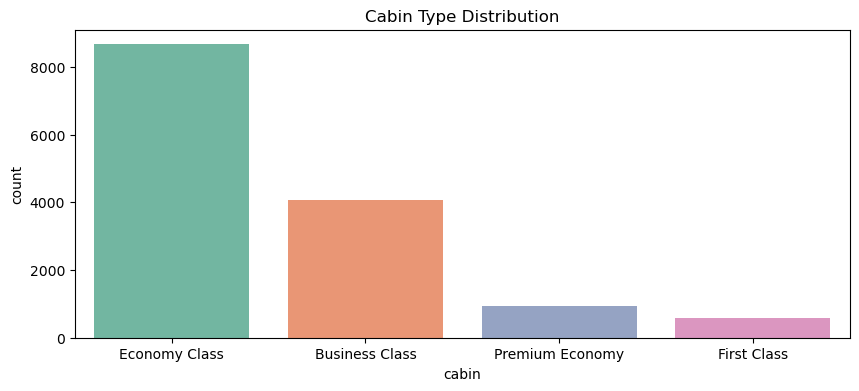

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='cabin', order=df['cabin'].value_counts().index, palette="Set2")
plt.title('Cabin Type Distribution')

#### observation
The majority of passengers traveled in Economy Class, followed by Business Class. Premium Economy and First Class have significantly fewer passengers, indicating a preference for more economical travel options.

#### pie chart

Text(0, 0.5, '')

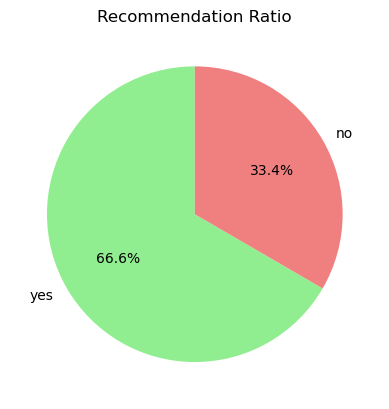

In [42]:
df['recommended'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["lightgreen", "lightcoral"])
plt.title('Recommendation Ratio')
plt.ylabel('')

#### Observation
Approximately 66.6% of passengers would recommend the airline, while 33.4% would not. This indicates a generally positive customer experience overall.

In [44]:
df.head(2)

,Unnamed: 0,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,month_flown,year_flown
0,7,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,yes,positive,4,2019
1,15,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,1,2,no,positive,4,2019


### histogram

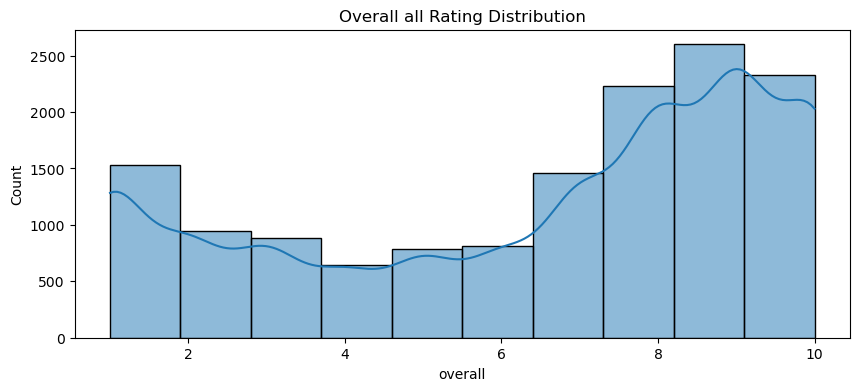

In [46]:
plt.figure(figsize=(10,4))
sns.histplot(df["overall"],bins=10,kde=True)
plt.title("Overall all Rating Distribution")
plt.show()

### observation:
The rating distribution is bimodal, with peaks at both low (1–2) and high (9–10) ratings, indicating polarized user opinions. Middle-range ratings (3–6) are less frequent, suggesting fewer neutral responses.

#### bivariate analysis
 bivariate analysis to explore relationships between two variables

#### Line plot

Text(0, 0.5, 'Percentage Recommended')

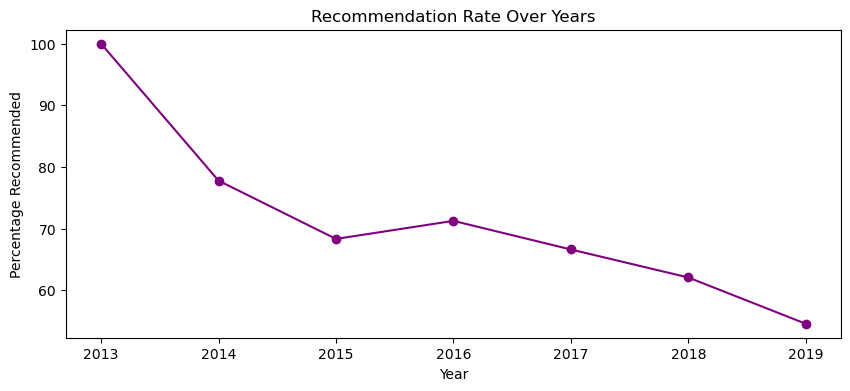

In [50]:
plt.figure(figsize=(10,4))
rec_by_year = df.groupby('year_flown')['recommended'].apply(lambda x: (x == 'yes').mean() * 100)
rec_by_year.plot(marker='o', linestyle='-', color='purple')
plt.title('Recommendation Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage Recommended')

#### Observation
The recommendation rate has shown a consistent decline from 2013 to 2019. This suggests a gradual drop in passenger satisfaction over the years.

#### BarPlot

Text(0.5, 0, 'Cabin Class')

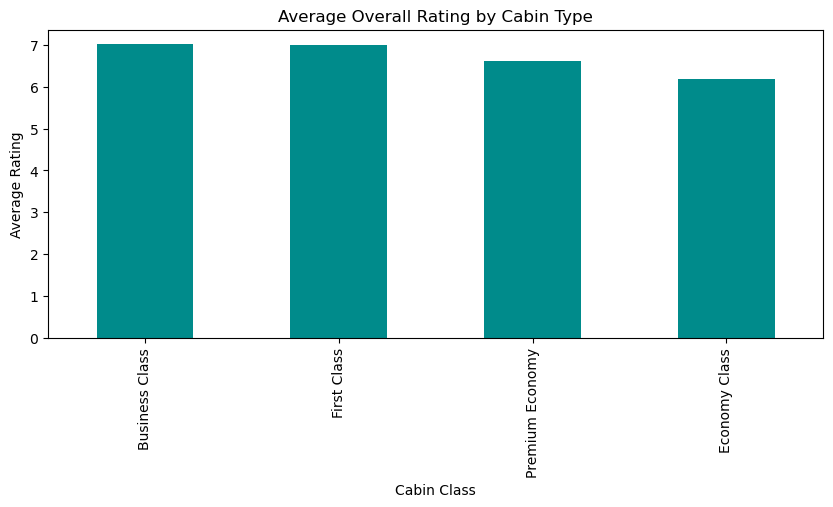

In [53]:
plt.figure(figsize=(10,4))
df.groupby('cabin')['overall'].mean().sort_values(ascending=False).plot(kind='bar', color='darkcyan')
plt.title('Average Overall Rating by Cabin Type')
plt.ylabel('Average Rating')
plt.xlabel('Cabin Class')

#### Observation
Among all cabin types, Business Class received the highest average overall rating, followed closely by First Class. Premium Economy and Economy Class had comparatively lower average ratings, with Economy Class recording the lowest customer satisfaction scores.

In [55]:
df.columns

Index(['Unnamed: 0', 'overall', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'ground_service',
       'value_for_money', 'recommended', 'sentiment', 'month_flown',
       'year_flown'],
      dtype='object')

#### multivariate analysis
multivariate analysis to examine interactions among three or more variables for deeper insights.

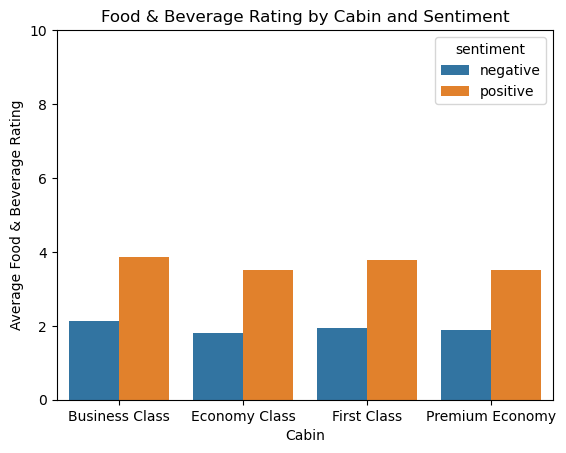

In [57]:
avg_fb = df.groupby(['cabin', 'sentiment'])['food_bev'].mean().reset_index()

sns.barplot(data=avg_fb, x='cabin', y='food_bev', hue='sentiment')
plt.title('Food & Beverage Rating by Cabin and Sentiment')
plt.xlabel('Cabin')
plt.ylabel('Average Food & Beverage Rating')
plt.ylim(0, 10)
plt.show()

#### Observations
1. In all cabin classes, positive sentiment customers rated food and beverage consistently higher than negative sentiment customers.


2. Business Class and First Class received the highest average positive ratings, while Economy Class showed the lowest ratings overall

#### correralation analysis
Correlation analysis is a statistical method used to measure the strength and direction of the relationship between two continuous variables, helping to identify patterns and dependencies within the data.

In [60]:
int_data = df.select_dtypes(include = ['int', 'float'])
int_data.head()
len(int_data.columns)

9

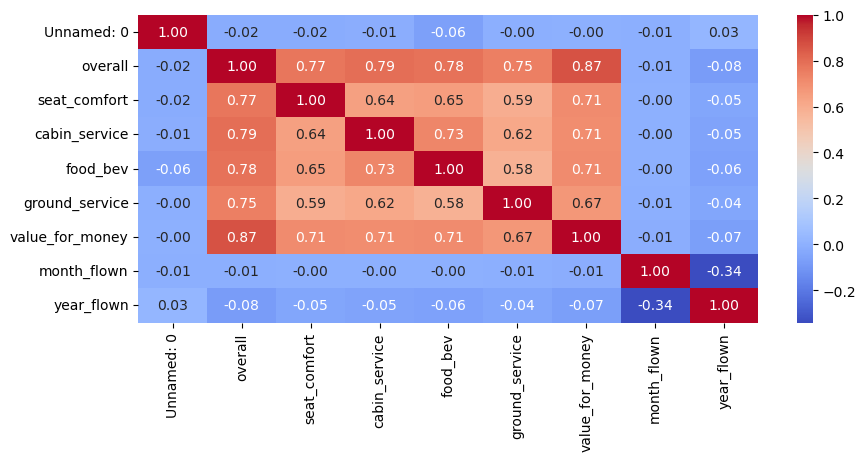

In [61]:
plt.figure(figsize=(10,4))
sns.heatmap(int_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### observation:
The heatmap shows a strong positive correlation between the 'overall' rating and features like 'seat_comfort', 'cabin_service', and 'value_for_money', indicating these factors significantly influence customer satisfaction.

#### Boxplot
A boxplot is a graphical representation used to detect outliers by displaying the distribution of a dataset through its minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum
where values falling below (Q1 - 1.5 × IQR) or above (Q3 + 1.5 × IQR) are considered outliers.

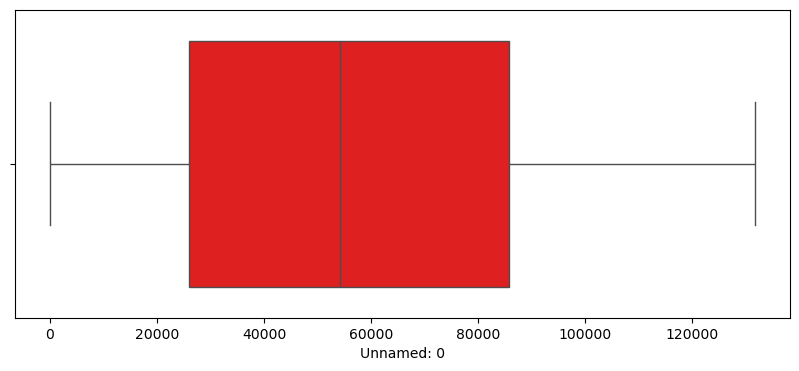

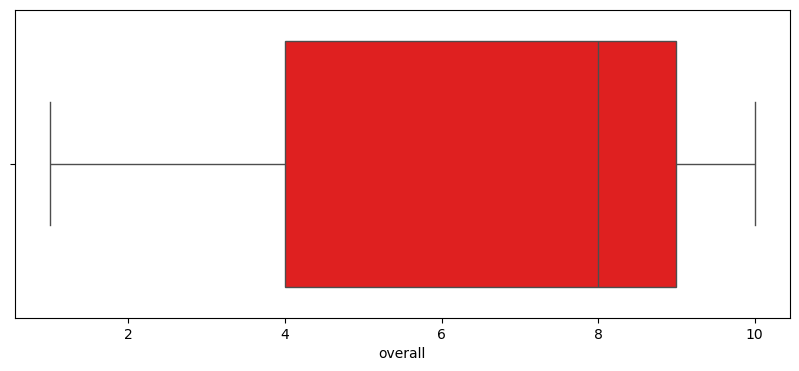

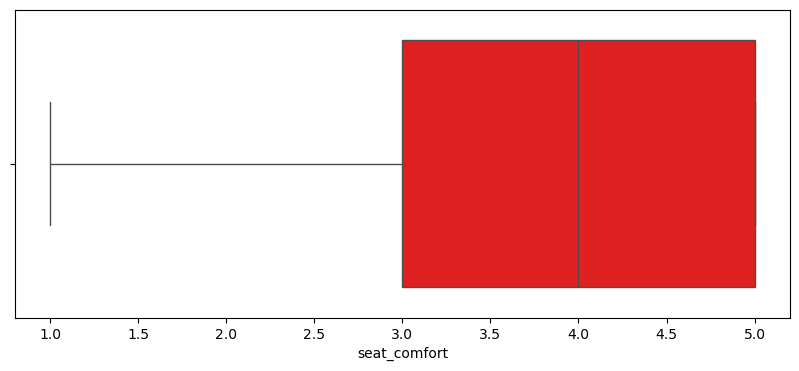

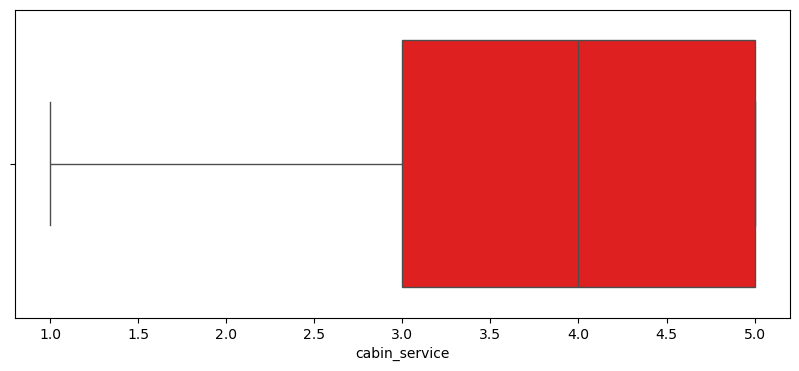

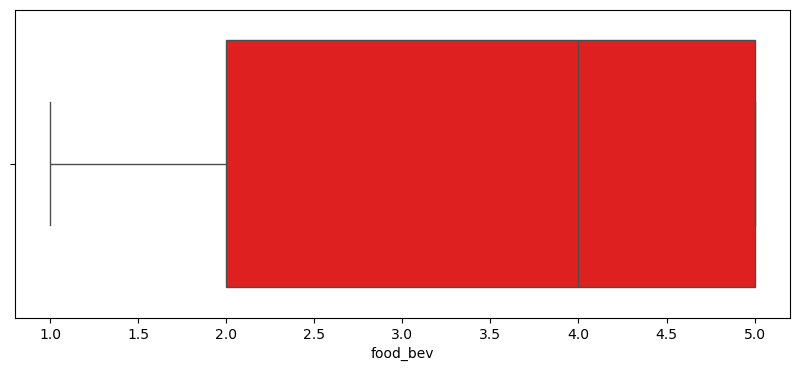

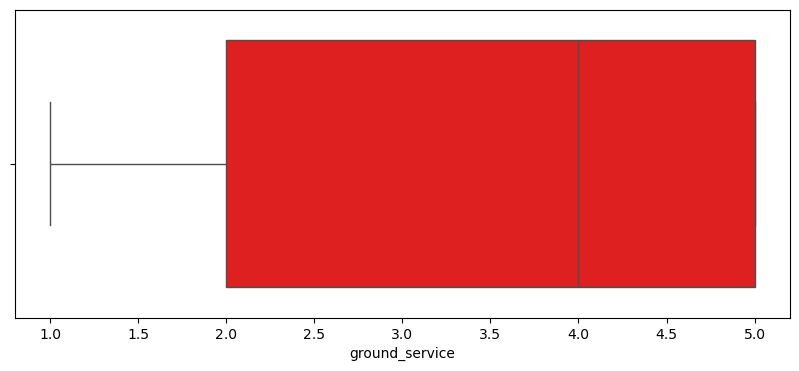

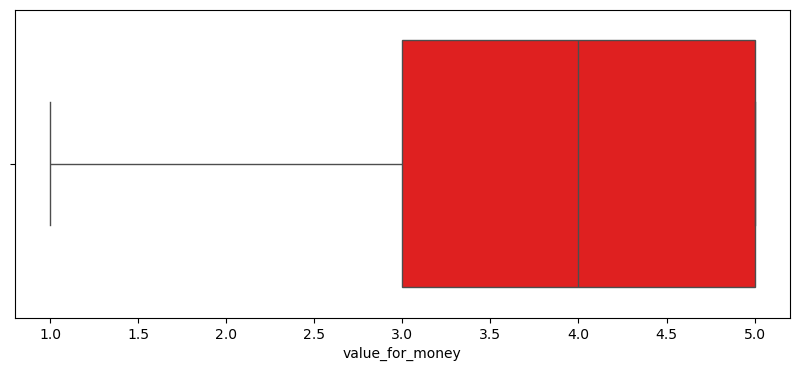

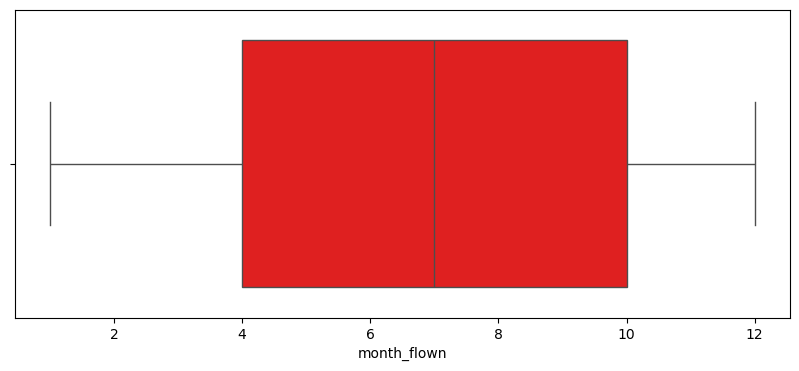

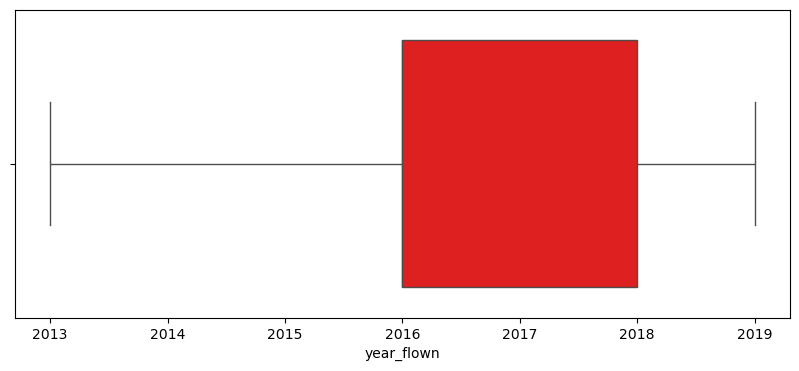

In [64]:
for i in int_data.columns:
    plt.figure(figsize = (10,4))
    #plt.subplot(len(int_data.columns), 1, i)
    sns.boxplot(x = df[i], color = 'r')
    plt.show()

#### observation
Conclusion: Since there are no extreme values affecting the data distribution, we proceed to the next step of the analysis without requiring any outlier treatment.

In [66]:
df.columns
df.head()

,Unnamed: 0,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,sentiment,month_flown,year_flown
0,7,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,yes,positive,4,2019
1,15,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,1,2,no,positive,4,2019
2,17,6,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,yes,positive,4,2019
3,19,1,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,no,negative,2,2019
4,29,2,Solo Leisure,Economy Class,2019-03-01,1,3,2,1,1,no,positive,3,2019


In [67]:
df.columns

Index(['Unnamed: 0', 'overall', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'ground_service',
       'value_for_money', 'recommended', 'sentiment', 'month_flown',
       'year_flown'],
      dtype='object')

#### To convert categorical variables into numerical format for machine learning models, we applied One-Hot Encoding to the following columns:

In [69]:
df = pd.get_dummies(df, columns = ['traveller_type', 'cabin', 'sentiment' ])
df

,Unnamed: 0,overall,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,month_flown,...,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Traveller,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,sentiment_negative,sentiment_positive
0,7,10,2019-04-01,4,5,5,5,5,yes,4,...,False,False,True,False,False,True,False,False,False,True
1,15,2,2019-04-01,3,3,2,1,2,no,4,...,False,False,True,False,False,True,False,False,False,True
2,17,6,2019-04-01,2,3,3,3,3,yes,4,...,False,False,True,False,False,True,False,False,False,True
3,19,1,2019-02-01,1,1,1,1,1,no,2,...,False,False,True,False,False,True,False,False,True,False
4,29,2,2019-03-01,1,3,2,1,1,no,3,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,131676,6,2015-09-01,2,4,2,4,5,yes,9,...,False,False,True,False,False,True,False,False,False,True
14211,131680,7,2015-01-01,2,2,2,2,5,yes,1,...,True,False,False,False,False,True,False,False,False,True
14212,131696,1,2015-07-01,1,1,1,1,1,no,7,...,False,True,False,False,False,True,False,False,False,True
14213,131702,10,2015-07-01,5,5,5,4,4,yes,7,...,True,False,False,False,False,True,False,False,False,True


#### Label Encoding
We applied Label Encoding to the recommended column to convert the categorical values ('yes' and 'no') into numeric values (1 and 0), making it suitable for machine learning models.




In [71]:
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})
df

,Unnamed: 0,overall,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,month_flown,...,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Traveller,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,sentiment_negative,sentiment_positive
0,7,10,2019-04-01,4,5,5,5,5,1,4,...,False,False,True,False,False,True,False,False,False,True
1,15,2,2019-04-01,3,3,2,1,2,0,4,...,False,False,True,False,False,True,False,False,False,True
2,17,6,2019-04-01,2,3,3,3,3,1,4,...,False,False,True,False,False,True,False,False,False,True
3,19,1,2019-02-01,1,1,1,1,1,0,2,...,False,False,True,False,False,True,False,False,True,False
4,29,2,2019-03-01,1,3,2,1,1,0,3,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,131676,6,2015-09-01,2,4,2,4,5,1,9,...,False,False,True,False,False,True,False,False,False,True
14211,131680,7,2015-01-01,2,2,2,2,5,1,1,...,True,False,False,False,False,True,False,False,False,True
14212,131696,1,2015-07-01,1,1,1,1,1,0,7,...,False,True,False,False,False,True,False,False,False,True
14213,131702,10,2015-07-01,5,5,5,4,4,1,7,...,True,False,False,False,False,True,False,False,False,True


In [72]:
df.head()

,Unnamed: 0,overall,date_flown,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,month_flown,...,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Traveller,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,sentiment_negative,sentiment_positive
0,7,10,2019-04-01,4,5,5,5,5,1,4,...,False,False,True,False,False,True,False,False,False,True
1,15,2,2019-04-01,3,3,2,1,2,0,4,...,False,False,True,False,False,True,False,False,False,True
2,17,6,2019-04-01,2,3,3,3,3,1,4,...,False,False,True,False,False,True,False,False,False,True
3,19,1,2019-02-01,1,1,1,1,1,0,2,...,False,False,True,False,False,True,False,False,True,False
4,29,2,2019-03-01,1,3,2,1,1,0,3,...,False,False,True,False,False,True,False,False,False,True


In [73]:

for col in df.columns:
    print(f"{col}: {type(df[col].iloc[0])}")

Unnamed: 0: <class 'numpy.int64'>
overall: <class 'numpy.int32'>
date_flown: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
seat_comfort: <class 'numpy.int32'>
cabin_service: <class 'numpy.int32'>
food_bev: <class 'numpy.int32'>
ground_service: <class 'numpy.int32'>
value_for_money: <class 'numpy.int32'>
recommended: <class 'numpy.int64'>
month_flown: <class 'numpy.int32'>
year_flown: <class 'numpy.int32'>
traveller_type_Business: <class 'numpy.bool_'>
traveller_type_Couple Leisure: <class 'numpy.bool_'>
traveller_type_Family Leisure: <class 'numpy.bool_'>
traveller_type_Solo Leisure: <class 'numpy.bool_'>
traveller_type_Traveller: <class 'numpy.bool_'>
cabin_Business Class: <class 'numpy.bool_'>
cabin_Economy Class: <class 'numpy.bool_'>
cabin_First Class: <class 'numpy.bool_'>
cabin_Premium Economy: <class 'numpy.bool_'>
sentiment_negative: <class 'numpy.bool_'>
sentiment_positive: <class 'numpy.bool_'>


In [74]:
df=df.drop(['date_flown'],axis=1)
df

,Unnamed: 0,overall,seat_comfort,cabin_service,food_bev,ground_service,value_for_money,recommended,month_flown,year_flown,...,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Traveller,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,sentiment_negative,sentiment_positive
0,7,10,4,5,5,5,5,1,4,2019,...,False,False,True,False,False,True,False,False,False,True
1,15,2,3,3,2,1,2,0,4,2019,...,False,False,True,False,False,True,False,False,False,True
2,17,6,2,3,3,3,3,1,4,2019,...,False,False,True,False,False,True,False,False,False,True
3,19,1,1,1,1,1,1,0,2,2019,...,False,False,True,False,False,True,False,False,True,False
4,29,2,1,3,2,1,1,0,3,2019,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,131676,6,2,4,2,4,5,1,9,2015,...,False,False,True,False,False,True,False,False,False,True
14211,131680,7,2,2,2,2,5,1,1,2015,...,True,False,False,False,False,True,False,False,False,True
14212,131696,1,1,1,1,1,1,0,7,2015,...,False,True,False,False,False,True,False,False,False,True
14213,131702,10,5,5,5,4,4,1,7,2015,...,True,False,False,False,False,True,False,False,False,True


#### Logistic Regression

#### Model preparation

#### Define variables

In [78]:
x=df.drop(['recommended'],axis=1).values
y=df['recommended'].values

#### train_test_split

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

#### Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#### import LogisticRegression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
log= LogisticRegression()

In [86]:
log.fit(x_train,y_train)

LogisticRegression()

#### predicting the result

In [88]:
log_pred=log.predict(x_test)
log_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [89]:
y_test

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

#### checking accuracy

In [91]:
print("Training Score: ", round(log.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(log.score(x_test, y_test)*100,2), "%")

Training Score:  95.12 %
Testing Score:  95.17 %


#### Confusion Matrix

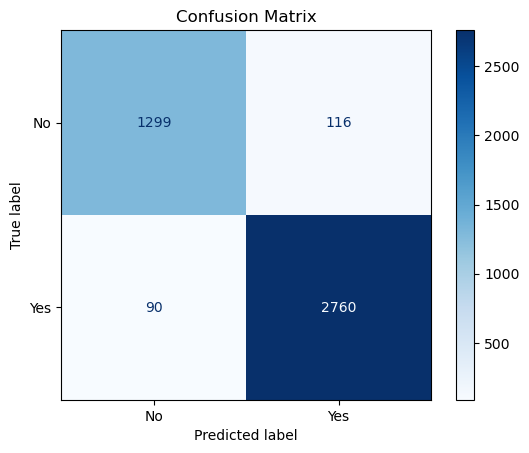

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.96


In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, log_pred, labels=[0,1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, log_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, log_pred, pos_label=1)
recall = recall_score(y_test, log_pred, pos_label=1)
f1 = f1_score(y_test, log_pred, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")


### Decision tree classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(x_train, y_train)


DecisionTreeClassifier()

In [96]:
dtr_pred = dtr.predict(x_test)
print("The Predicted values are: ", dtr_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

print("Training Score: ", round(dtr.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(dtr.score(x_test, y_test)*100,2), "%")

The Predicted values are:  [1 1 1 ... 1 0 0]
The Actual values are:  [1 1 1 ... 1 0 0]
--------------------------------------------------------------------------------
Training Score:  100.0 %
Testing Score:  92.71 %


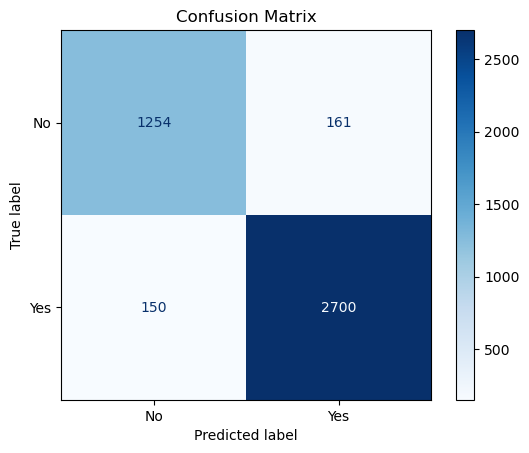

Accuracy       : 0.93
Error Rate     : 0.07
Precision (Yes): 0.94
Recall (Yes)   : 0.95
F1 Score (Yes) : 0.95


In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, dtr_pred, labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, dtr_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, dtr_pred, pos_label=1)
recall = recall_score(y_test, dtr_pred, pos_label=1)
f1 = f1_score(y_test, dtr_pred, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [100]:
rf_pred = rf.predict(x_test)
print("The Predicted values are: ", rf_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

print("Training Score: ", round(rf.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(rf.score(x_test, y_test)*100,2), "%")

The Predicted values are:  [1 1 1 ... 1 0 0]
The Actual values are:  [1 1 1 ... 1 0 0]
--------------------------------------------------------------------------------
Training Score:  100.0 %
Testing Score:  95.55 %


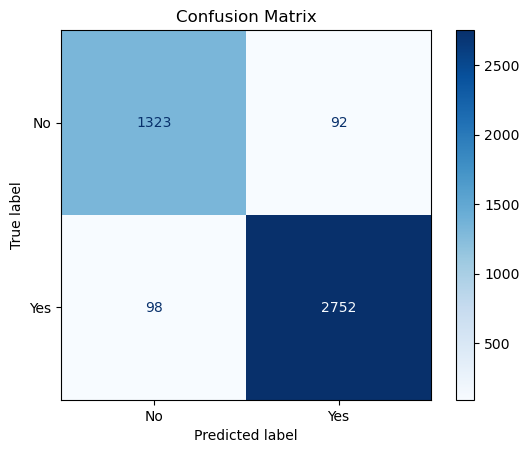

Accuracy       : 0.96
Error Rate     : 0.04
Precision (Yes): 0.97
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.97


In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred, labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, rf_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, rf_pred, pos_label=1)
recall = recall_score(y_test, rf_pred, pos_label=1)
f1 = f1_score(y_test, rf_pred, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### KNeighborsClassifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [104]:
knn_pred = knn.predict(x_test)
print("The Predicted values are: ", knn_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

print("Training Score: ", round(knn.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(knn.score(x_test, y_test)*100,2), "%")

The Predicted values are:  [1 1 1 ... 1 0 0]
The Actual values are:  [1 1 1 ... 1 0 0]
--------------------------------------------------------------------------------
Training Score:  94.52 %
Testing Score:  93.48 %


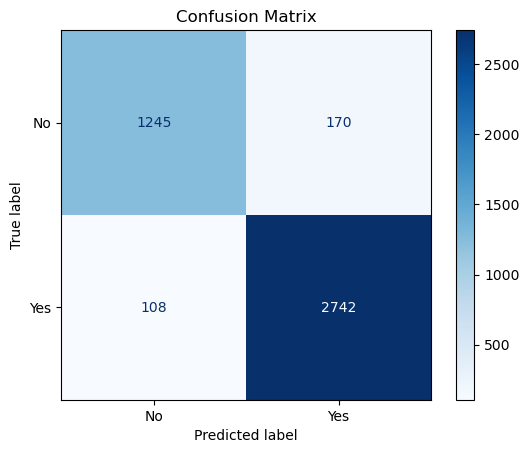

Accuracy       : 0.93
Error Rate     : 0.07
Precision (Yes): 0.94
Recall (Yes)   : 0.96
F1 Score (Yes) : 0.95


In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, knn_pred, labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, knn_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, knn_pred, pos_label=1)
recall = recall_score(y_test, knn_pred, pos_label=1)
f1 = f1_score(y_test, knn_pred, pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### Support Vector Machine (SVM):

In [107]:
from sklearn.svm import SVC

# Create and train the SVM model
svm = SVC()  # You can customize kernel, C, gamma if needed
svm.fit(x_train, y_train)

# Predict on test data
svm_pred = svm.predict(x_test)

# Print predictions and actual values
print("The Predicted values are: ", svm_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

# Training accuracy
print("Training Score: ", round(svm.score(x_train, y_train) * 100, 2), "%")
print("Testing Score: ", round(svm.score(x_test, y_test)*100,2), "%")

The Predicted values are:  [1 1 1 ... 1 0 0]
The Actual values are:  [1 1 1 ... 1 0 0]
--------------------------------------------------------------------------------
Training Score:  95.91 %
Testing Score:  95.03 %


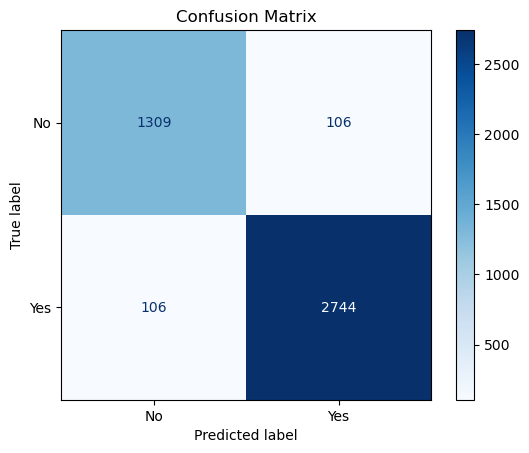

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.96
F1 Score (Yes) : 0.96


In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, svm_pred , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, svm_pred )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, svm_pred , pos_label=1)
recall = recall_score(y_test, svm_pred , pos_label=1)
f1 = f1_score(y_test, svm_pred , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

In [109]:
from sklearn.model_selection import cross_val_score

### Decision tree Classifier


In [111]:
print("Training:", ((cross_val_score(dtr ,x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(dtr, x_test, y_test))*100).mean().astype(int), "%")

Training: 92 %
Testing: 92 %



### Support Vector Machine (SVM):

In [113]:
print("Training:", ((cross_val_score( svm,x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(svm, x_test, y_test))*100).mean().astype(int), "%")

Training: 94 %
Testing: 94 %


### KNeighborsClassifier

In [115]:
print("Training:", ((cross_val_score(knn ,x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(knn, x_test, y_test))*100).mean().astype(int), "%")

Training: 93 %
Testing: 92 %


### Logistic Regression

In [117]:
print("Training:", ((cross_val_score(log ,x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(log , x_test, y_test))*100).mean().astype(int), "%")

Training: 95 %
Testing: 94 %


### Random Forest Classifier

In [119]:
print("Training:", ((cross_val_score(rf ,x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(rf , x_test, y_test))*100).mean().astype(int), "%")

Training: 95 %
Testing: 95 %


In [120]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### XGBClassifier - Model Evaluation Observation

In [122]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

# Predict on train and test sets
train_pred = xgb_model.predict(x_train)
test_pred = xgb_model.predict(x_test)

# Accuracy scores
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Print results
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 99.64%
Testing Accuracy: 94.91%


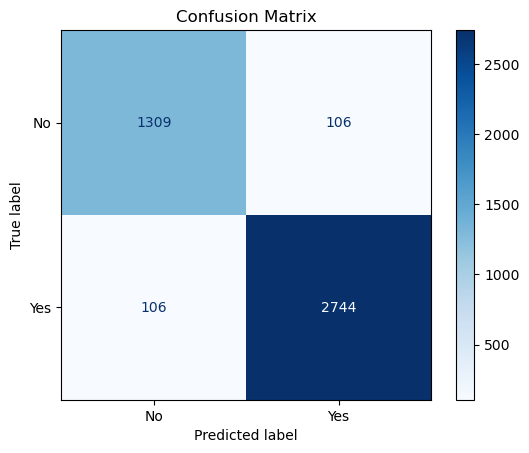

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.96
F1 Score (Yes) : 0.96


In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute the confusion matrix
cm = confusion_matrix(y_test, svm_pred , labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, svm_pred )

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='Yes' because your positive class is 'Yes'
precision = precision_score(y_test, svm_pred , pos_label=1)
recall = recall_score(y_test, svm_pred , pos_label=1)
f1 = f1_score(y_test, svm_pred , pos_label=1)

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

### printing all the accuracy using dataframe

In [125]:
overall_scores = pd.DataFrame({'Logistic Regression': ((log.score(x_train, y_train))*100, (log.score(x_test, y_test))*100),
                              'Decision Tree Classifier' : ((dtr.score(x_train, y_train))*100, (dtr.score(x_test, y_test))*100),
                              'Random Forest Classifier': ((rf.score(x_train, y_train))*100, (rf.score(x_test, y_test))*100),
                               'KNN ': ((knn.score(x_train, y_train))*100, (knn.score(x_test, y_test))*100),
                               'SVM ': ((svm.score(x_train, y_train))*100, (svm.score(x_test, y_test))*100),
                              'xgboost': ((xgb_model.score(x_train, y_train))*100, (xgb_model.score(x_test, y_test))*100)})
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Logistic Regression,95.115578,95.169988
Decision Tree Classifier,100.000000,92.708089
Random Forest Classifier,100.000000,95.545135
KNN,94.522613,93.481829
SVM,95.909548,95.029308
xgboost,99.638191,94.912075


#### observations
**1.Logistic Regression**: Shows consistent and balanced accuracy with 95% on both training and test sets, indicating good generalization.

**2.Decision Tree Classifier**: Achieves 100% on training data but drops to 93.01% on test data, suggesting possible overfitting.

**3.Random Forest Classifier**: Also reaches 100% training accuracy with 95.68% on test data, slightly better generalization than Decision Tree.

**4.KNN***: Performs well with 94.60% training and 93.69% test accuracy, indicating stable but slightly lower performance than ensemble models.

**5.SVM**: Maintains balanced accuracy of around 95.80% training and 94.95% test, showing reliable performance with minimal overfitting.

**6.XGBoost**: Delivers 99.74% training accuracy and 95.12% test accuracy, offering strong performance but with a hint of overfitting.